In [2]:
# Install necessary libraries
!pip install pandas matplotlib seaborn numpy


In [3]:
pip install notebook


In [4]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [8]:
# Load the data into a pandas DataFrame
df = pd.read_csv(r"C:\Users\Namratha Kadam\OneDrive\Desktop\data sets\Supermart Grocery Sales - Retail Analytics Dataset.csv")

# Display the first few rows to understand the structure of the data
df.head()


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [10]:
# Check for missing values in each column
df.isnull().sum()



Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [11]:
# Get data types and non-null values
df.info()

# Summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


In [12]:
# Drop rows with missing values (if necessary)
df.dropna(inplace=True)

# Alternatively, fill missing values (example: fill with median)
# df['column_name'].fillna(df['column_name'].median(), inplace=True)


In [14]:
print(df.columns)



Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')


In [16]:
df.columns = df.columns.str.strip()  # Remove any extra spaces



In [19]:
print(df[df['Order Date'].isna()])  # Show rows with invalid dates


     Order ID Customer Name           Category       Sub Category  \
12       OD13        Sharon             Snacks            Cookies   
14       OD15        Sundar  Eggs, Meat & Fish            Chicken   
15       OD16        Ramesh       Oil & Masala  Edible Oil & Ghee   
17       OD18        Arutra          Beverages      Health Drinks   
18       OD19       Haseena  Eggs, Meat & Fish             Mutton   
...       ...           ...                ...                ...   
9985   OD9986         Shree  Eggs, Meat & Fish             Mutton   
9987   OD9988        Ganesh   Fruits & Veggies   Fresh Vegetables   
9989   OD9990        Sudeep  Eggs, Meat & Fish               Eggs   
9992   OD9993          Peer       Oil & Masala             Spices   
9993   OD9994        Ganesh        Food Grains       Atta & Flour   

             City Order Date   Region  Sales  Discount  Profit       State  
12       Dindigul        NaT    South   1659      0.19  315.21  Tamil Nadu  
14    Kanyakumari

In [31]:
df['Order Date'].fillna(df['Order Date'].min(), inplace=True)


In [32]:
print(df['Order Date'].isna().sum())  # Should return 0


0


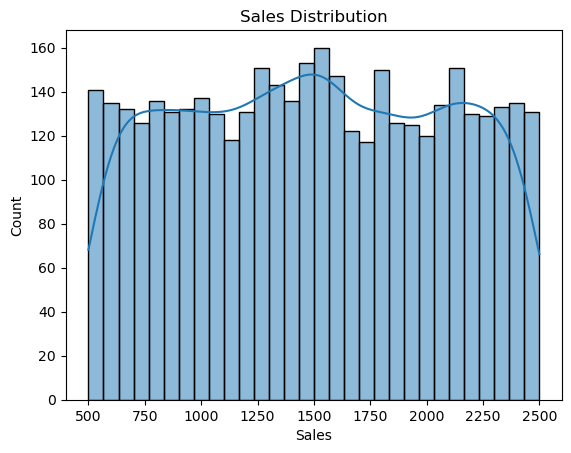

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check the distribution of sales
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title("Sales Distribution")
plt.show()


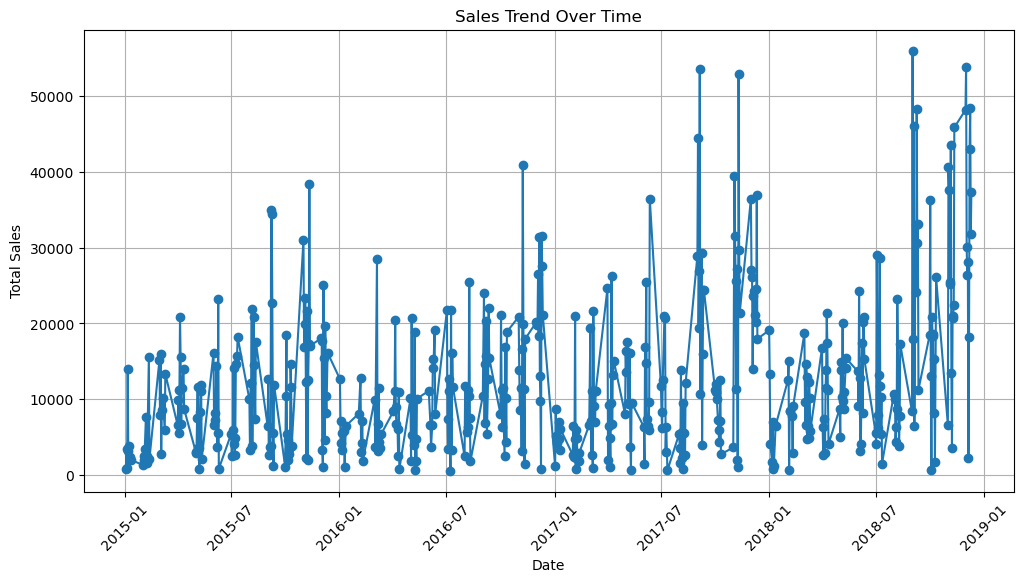

In [36]:
import matplotlib.pyplot as plt

# Group by date and sum sales
df_time_series = df.groupby('Order Date')['Sales'].sum()

# Plot sales over time
plt.figure(figsize=(12,6))
plt.plot(df_time_series, marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Sales Trend Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



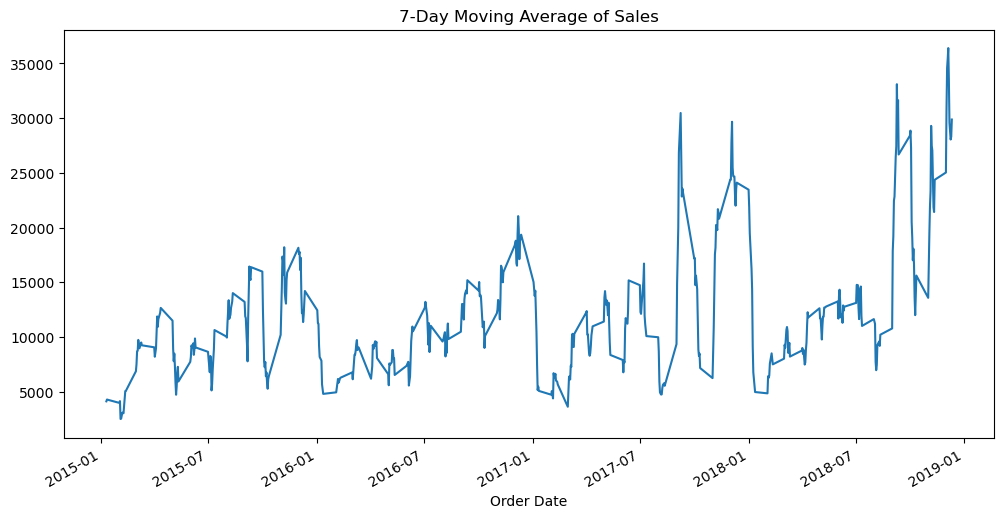

In [37]:
df_time_series.rolling(window=7).mean().plot(figsize=(12,6))
plt.title("7-Day Moving Average of Sales")
plt.show()


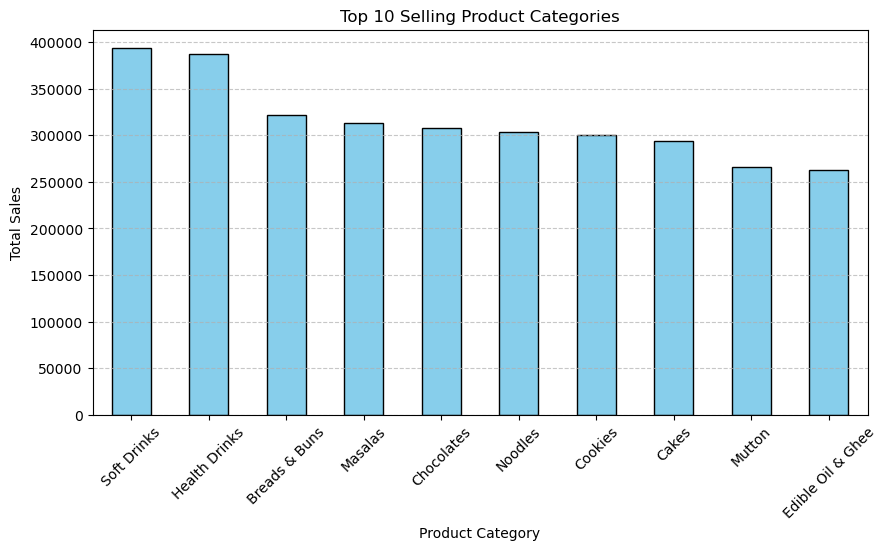

In [39]:
import matplotlib.pyplot as plt

# Group by product category and sum sales
top_products = df.groupby('Sub Category')['Sales'].sum().sort_values(ascending=False).head(10)

# Plot top-selling products
plt.figure(figsize=(10,5))
top_products.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.title("Top 10 Selling Product Categories")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


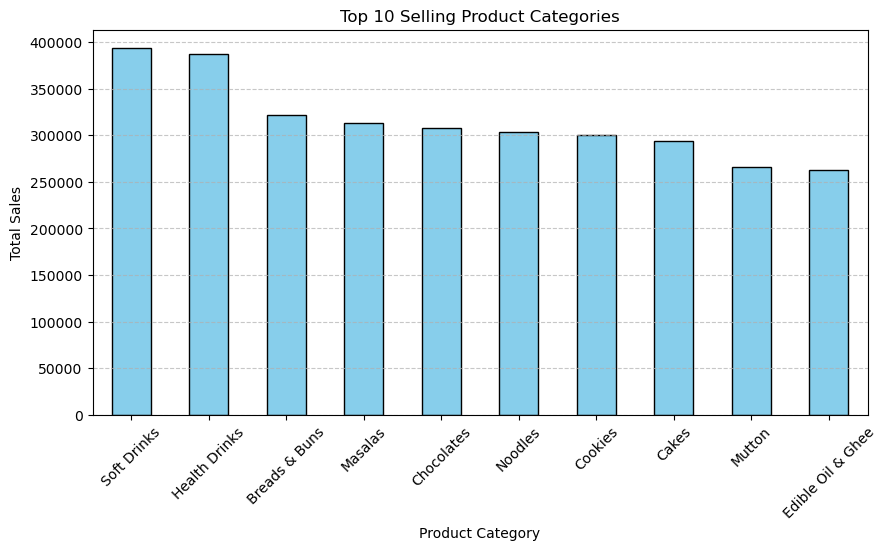

In [41]:
import matplotlib.pyplot as plt

# Group by product category and sum sales
top_products = df.groupby('Sub Category')['Sales'].sum().sort_values(ascending=False).head(10)

# Plot top-selling products
plt.figure(figsize=(10,5))
top_products.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.title("Top 10 Selling Product Categories")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



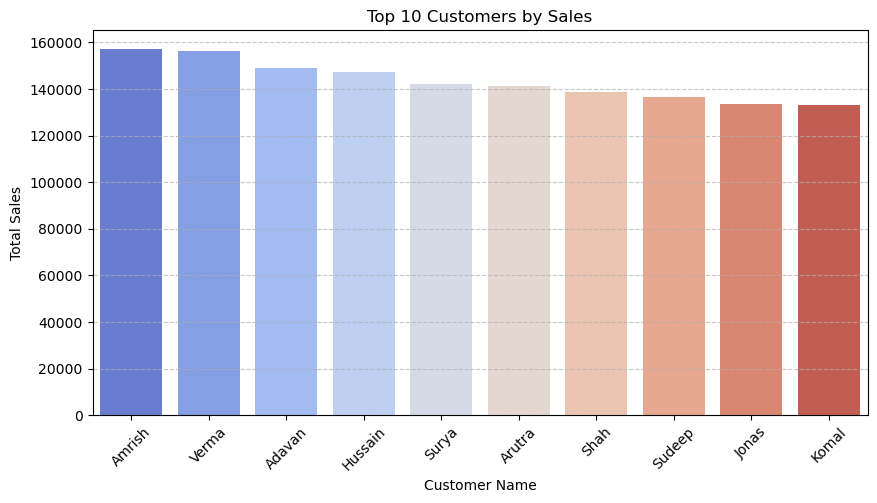

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by Customer Name and sum sales
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)

# Plot top customers by sales
plt.figure(figsize=(10,5))
sns.barplot(x=top_customers.index, y=top_customers.values, palette="coolwarm")
plt.xlabel("Customer Name")
plt.ylabel("Total Sales")
plt.title("Top 10 Customers by Sales")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



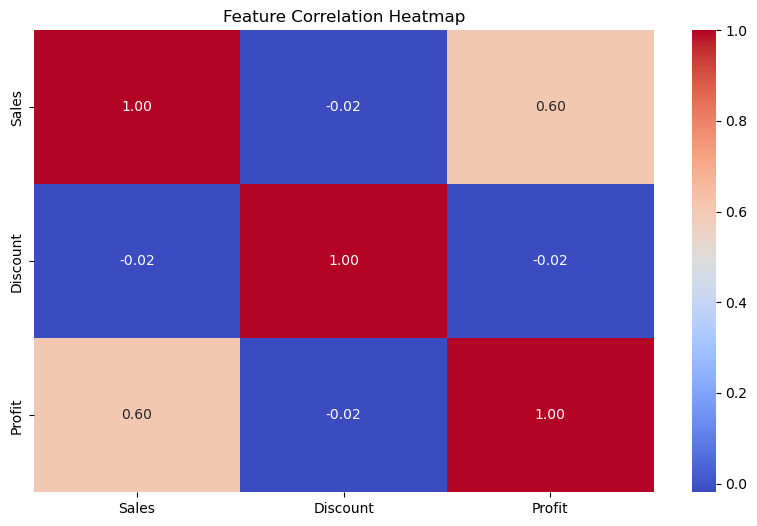

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Plot correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()



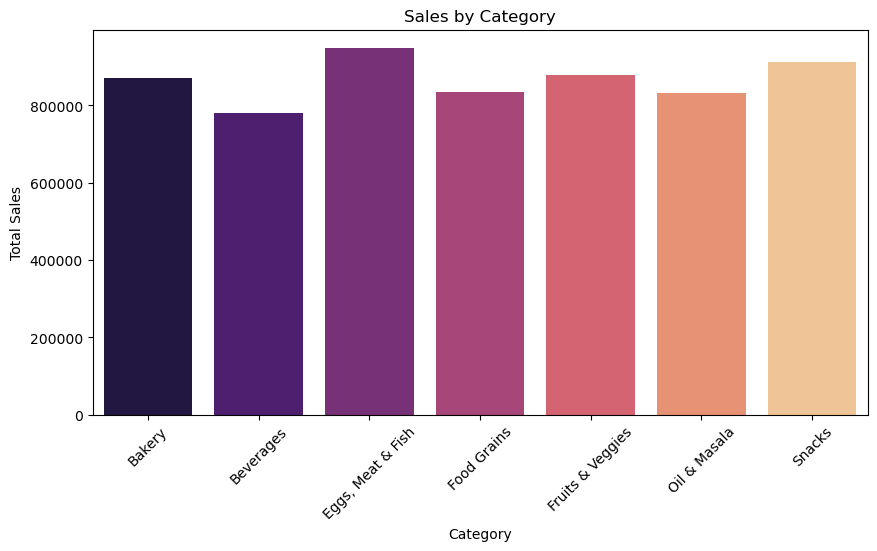

In [48]:
# Group by 'Category' and sum 'Sales'
category_sales = df.groupby('Category')['Sales'].sum()

# Plot sales by category
plt.figure(figsize=(10,5))
sns.barplot(x=category_sales.index, y=category_sales.values, palette="magma")
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

